# Logistic-Regression Computational Graph Homework
## Task 1
The cells below are a modified version of the notebook that we used in class to solve the 2D classification problem. While the structure of our computational graph is preseved, I've altered the input dimensions so we are now working 3D space. In this task you must rework our computational graph to be able to handle the modified input.

**Hint: Don't overthink this, you should only focus on how to update the existing arrays to work with a different shape**

*Note: I would prefer a generalized solution that can solve any number of features*

## Task 2
Evaluate the performance of your 3D logistic regression model by calculating the log_likelihood of the test dataset (X_test and Y_test). Put all code for this task underneath the cell marked ***Space for Task 2***.

In [18]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.utils import shuffle

In [19]:
np.random.seed(8)
num_obs = 8000

# Create our features to draw from two distinct 3D normal distributions
cov = np.array([[1., 1.],
          [1.  , 0.75],
          [1.  , 0.5 ],
          [0.75, 1.  ],
          [0.75, 0.75],
          [0.75, 0.5 ],
          [0.5 , 1.  ],
          [0.5 , 0.75],
          [0.5, 0.5]])
x1 = np.random.multivariate_normal([0, 0, 0], [[1, .75, 0.5],[.75, 1, 0.5], [.75, 0.5, 1]], num_obs)
x2 = np.random.multivariate_normal([3, 8, 5], [[1, .25, 0],[.25, 1, 0], [.25, 0, 1]], num_obs)


# Stack our inputs into one feature space
X = np.vstack((x1, x2))

Y = np.hstack((np.zeros(num_obs), np.ones(num_obs)))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: covariance is not positive-semidefinite.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


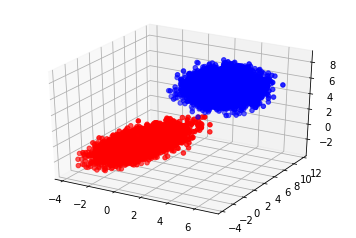

In [20]:
colors = ['red'] * num_obs + ['blue'] * num_obs
plt.figure(figsize=(12,8))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=colors)

In [21]:
# Our inputs (features) and outputs (labels)
X = X
Y = Y
orig_X = X.copy()
orig_Y = Y.copy()


# Lets randomize things so we don't end up cheating
X, Y = shuffle(X, Y)

# Now lets split things into training and testing sets
X_train = X[:-100]
Y_train = Y[:-100]
X_test = X[-100:]
Y_test = Y[-100:]

# Hint: We may want a variable to store the dimensions of our input space


In [22]:
def sigmoid(scores):
    """Take our scores and apply the sigmoid function
    Args:
        scores(np.array) - weighted features
    Returns:
        (np.array) - sigmoid output of weighted features"""
    
    return(1 / (1 + np.exp(-scores)))

def log_likelihood(X, Y, W):
    """Take our inputs, outputs, and weights and determine
    the logistic log-likelihood. This will be used to understand
    our models progress.
    Args:
        X (np.array) - Features/Indepednent Variables
        Y (np.array) - Classes/Dependent Variables
        W (np.array) - Weights
    Returns:
        (float) - log-likelihood of X, Y, W
    """
    
    w_feats = np.dot(X, W)
    log_like = np.sum(Y*w_feats - np.log(1 + np.exp(w_feats)))
    return(-log_like)

In [23]:
def logistic_regression(X, Y, num_steps, learning_rate, add_intercept=False):
    """Implementaiton of the logistic_regression algorithm.
    Args:
        X (np.array) - Features/Indepednent Variables
        Y (np.array) - Classes/Dependent Variables
        num_steps (int) - number of iterations through the algorithm
        learning_rate (float) - rate at which our alogrithm learns
        intercept (boolean) - should the intercept be defined
    returns:
        (np.array) - weights for each feature/intercept
    """
    
    if add_intercept:
        # Our intecept weigth B0 can be represented as X0*B0 where X0 is 1
        intercept = np.ones((X.shape[0], 1))
        # So by stacking on 1's to our array, we've created a placeholder for B0
        X = np.hstack((intercept, X))
        #Initialize our weights
        #W = np.zeros(3) # Modified for HW
        W = np.random.randn(X.shape[1])
    else:
        # Initialize our weights
        #W = np.zeros(2) # Modified for HW
        W = np.random.randn(X.shape[1])
    for step in range(num_steps):
        # Calculate the predictions for each record
        scores = np.dot(X, W)
        predictions = sigmoid(scores)

        # Calculate the error term
        #error = Y - predictions
        error = predictions - Y
        # We can calculate the gradient with a simple dot product
        gradient = np.dot(X.T, error)
        gradient /= X.shape[0]
        # Update our weights based on the calculated gradient
        W -= learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(X, Y, W))
        
    return W

In [24]:
# Calculate what weights optimize our logistic regression function
weights = logistic_regression(X, Y, num_steps = 25000, learning_rate = 1, add_intercept=True)


4802.199840025929
6.041454422239405
3.6479770846746415


In [25]:
from scipy.special import logit

ix = 10 # Index we will test

print(Y_test[ix]) # Expected output

# Predicted output
print(sigmoid(weights[0] + X_test[ix][0]*weights[1] + X_test[ix][1]*weights[2] + X_test[ix][2]*weights[3]))

1.0
0.9999968961169092


### Space for Task 2:

In [26]:
"""Code to determine log_likelihood for Logistic Regression"""

'Code to determine log_likelihood for Logistic Regression'

In [29]:
def eval(X_train, Y_train, X_test, Y_test, add_intercept):
	W = logistic_regression(X_train, Y_train, num_steps = 25000, learning_rate = 1, add_intercept = add_intercept)
	if add_intercept:
		intercept = np.ones((X_test.shape[0], 1))
		X_test = np.hstack((intercept, X_test))
	result = log_likelihood(X_test, Y_test, W)
	print(result)
	
eval(X_train, Y_train, X_test, Y_test, True)

10427.362316909132
5.993091673560529
3.6152640777671743
0.03251440940090283
